In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [6]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [8]:
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

In [10]:
input_dim = x_train_flat.shape[1]
encoding_dim = 32

In [12]:
input_layer = Input(shape=(input_dim,))
encoded = Dense(128, activation='relu')(input_layer)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)

In [14]:
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

In [16]:
autoencoder = Model(inputs=input_layer, outputs=decoded)

In [18]:
autoencoder.compile(optimizer='adam', loss='mse')

In [20]:
autoencoder.fit(x_train_flat, x_train_flat, epochs=10, batch_size=256, validation_data=(x_test_flat, x_test_flat))

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0961 - val_loss: 0.0386
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0348 - val_loss: 0.0265
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0249 - val_loss: 0.0212
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0211 - val_loss: 0.0190
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0190 - val_loss: 0.0175
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0176 - val_loss: 0.0165
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0166 - val_loss: 0.0158
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0158 - val_loss: 0.0151
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0152 - val_loss: 0.0144
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0145 - val_loss: 0.0138


In [24]:
reconstructed = autoencoder.predict(x_test_flat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [28]:
reconstruction_error = np.mean(np.square(x_test_flat - reconstructed), axis=1)

In [30]:
threshold = 0.01

In [34]:
anomalies = reconstruction_error > threshold

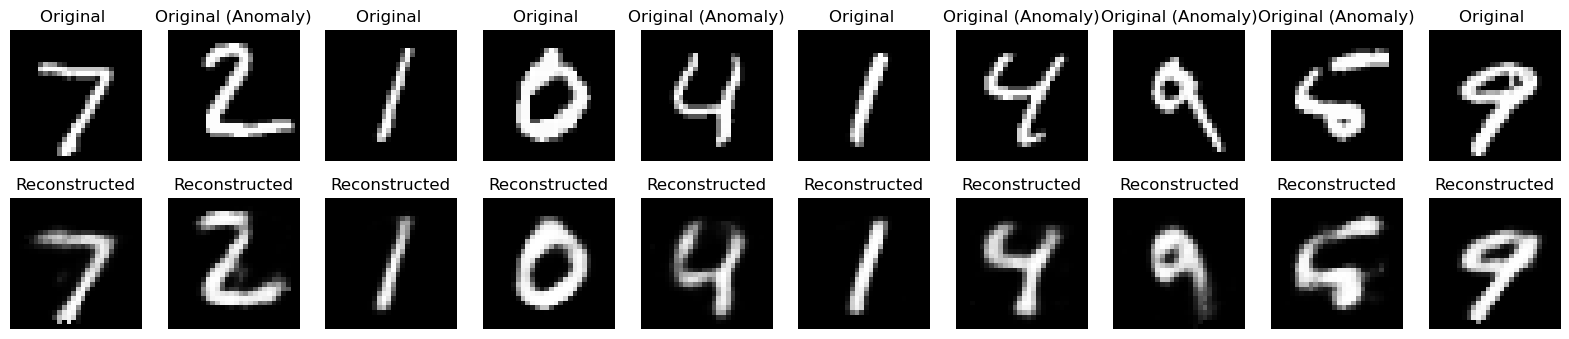

In [36]:
n = 10
plt.figure(figsize=(20, 4))

for i in range (n):
    ax=plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original"+(" (Anomaly)" if anomalies[i] else " "))
    plt.axis('off')

    ax=plt.subplot(2, n, i+1+n)
    plt.imshow(reconstructed[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')
plt.show()